<a href="https://colab.research.google.com/github/KunalAyush1/PyTorch_learning/blob/main/PyTorch1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from torch import nn

In [13]:
#Multi CLassification Problem


# Creating a toy dataset

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob , y_blob = make_blobs(n_samples=5000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

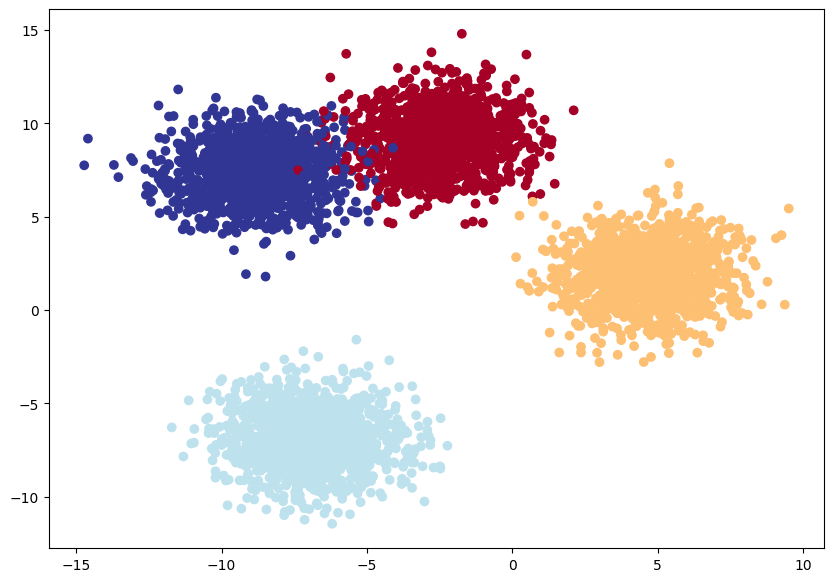

In [14]:
#Ploting data

plt.figure(figsize=(10,7))
plt.scatter( X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)



In [15]:
# Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [16]:
class BlobModel(nn.Module):
  def __init__(self, input_features , output_features, hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units , out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units , out_features = output_features)
    )
  def forward(self , x):
    return self.linear_layer_stack(x)

model = BlobModel(input_features = 2, output_features = 4, hidden_units = 8).to(device)

model



BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [17]:
def accuracy(y_true,  y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [18]:
#Loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)

In [19]:
# Coverting our model ouputs(logits) => prediction probabilities(Softmax for multiclass)
model.eval()

with torch.inference_mode():
  y_logits = model(X_blob_test.to(device))


y_pred_probs = torch.softmax(y_logits , dim = 1)
y_pred_probs[0]

tensor([0.3011, 0.1843, 0.2823, 0.2323])

In [20]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [21]:
torch.argmax(y_pred_probs[0])

tensor(0)

In [22]:
#PREDCTION PROB => LABELS

y_preds = torch.argmax(y_pred_probs , dim =1 )
y_preds

tensor([0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [32]:
# Building training and testing loop

torch.manual_seed(42)
epochs = 100

#putting data on device

X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

#loop
for epoch in range(epochs):
  model.train()
  y_logits = model(X_blob_train)
  y_pred = torch.softmax(y_logits , dim = 1).argmax(dim=1)

  loss = loss_fn(y_logits , y_blob_train)
  acc = accuracy(y_blob_train , y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_blob_test)
    test_preds = torch.softmax(test_logits , dim = 1).argmax(dim=1)

    test_loss = loss_fn(test_logits , y_blob_test)
    test_acc = accuracy(y_blob_test , test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss : {loss:.4f} | Accuracy : {acc:.2f}% | Test Loss : {test_loss:.4f} | Test acc : {test_acc:.2f}% " )





Epoch: 0 | Loss : 0.0250 | Accuracy : 99.08% | Test Loss : 0.0301 | Test acc : 98.80% 
Epoch: 10 | Loss : 0.0249 | Accuracy : 99.08% | Test Loss : 0.0300 | Test acc : 98.80% 
Epoch: 20 | Loss : 0.0248 | Accuracy : 99.08% | Test Loss : 0.0300 | Test acc : 98.80% 
Epoch: 30 | Loss : 0.0247 | Accuracy : 99.10% | Test Loss : 0.0299 | Test acc : 98.80% 
Epoch: 40 | Loss : 0.0246 | Accuracy : 99.10% | Test Loss : 0.0299 | Test acc : 98.80% 
Epoch: 50 | Loss : 0.0246 | Accuracy : 99.10% | Test Loss : 0.0298 | Test acc : 98.80% 
Epoch: 60 | Loss : 0.0245 | Accuracy : 99.10% | Test Loss : 0.0297 | Test acc : 98.80% 
Epoch: 70 | Loss : 0.0244 | Accuracy : 99.10% | Test Loss : 0.0297 | Test acc : 98.80% 
Epoch: 80 | Loss : 0.0244 | Accuracy : 99.10% | Test Loss : 0.0297 | Test acc : 98.80% 
Epoch: 90 | Loss : 0.0243 | Accuracy : 99.10% | Test Loss : 0.0296 | Test acc : 98.80% 


In [34]:


## code to import code from some website
import requests

from pathlib import Path

#Dowload helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


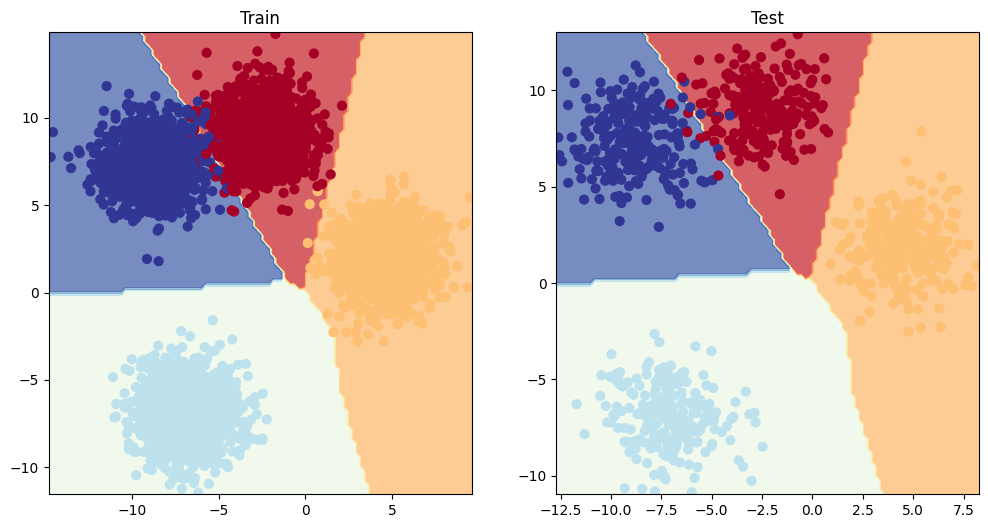

In [35]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)

# Important Classification evaluation metrics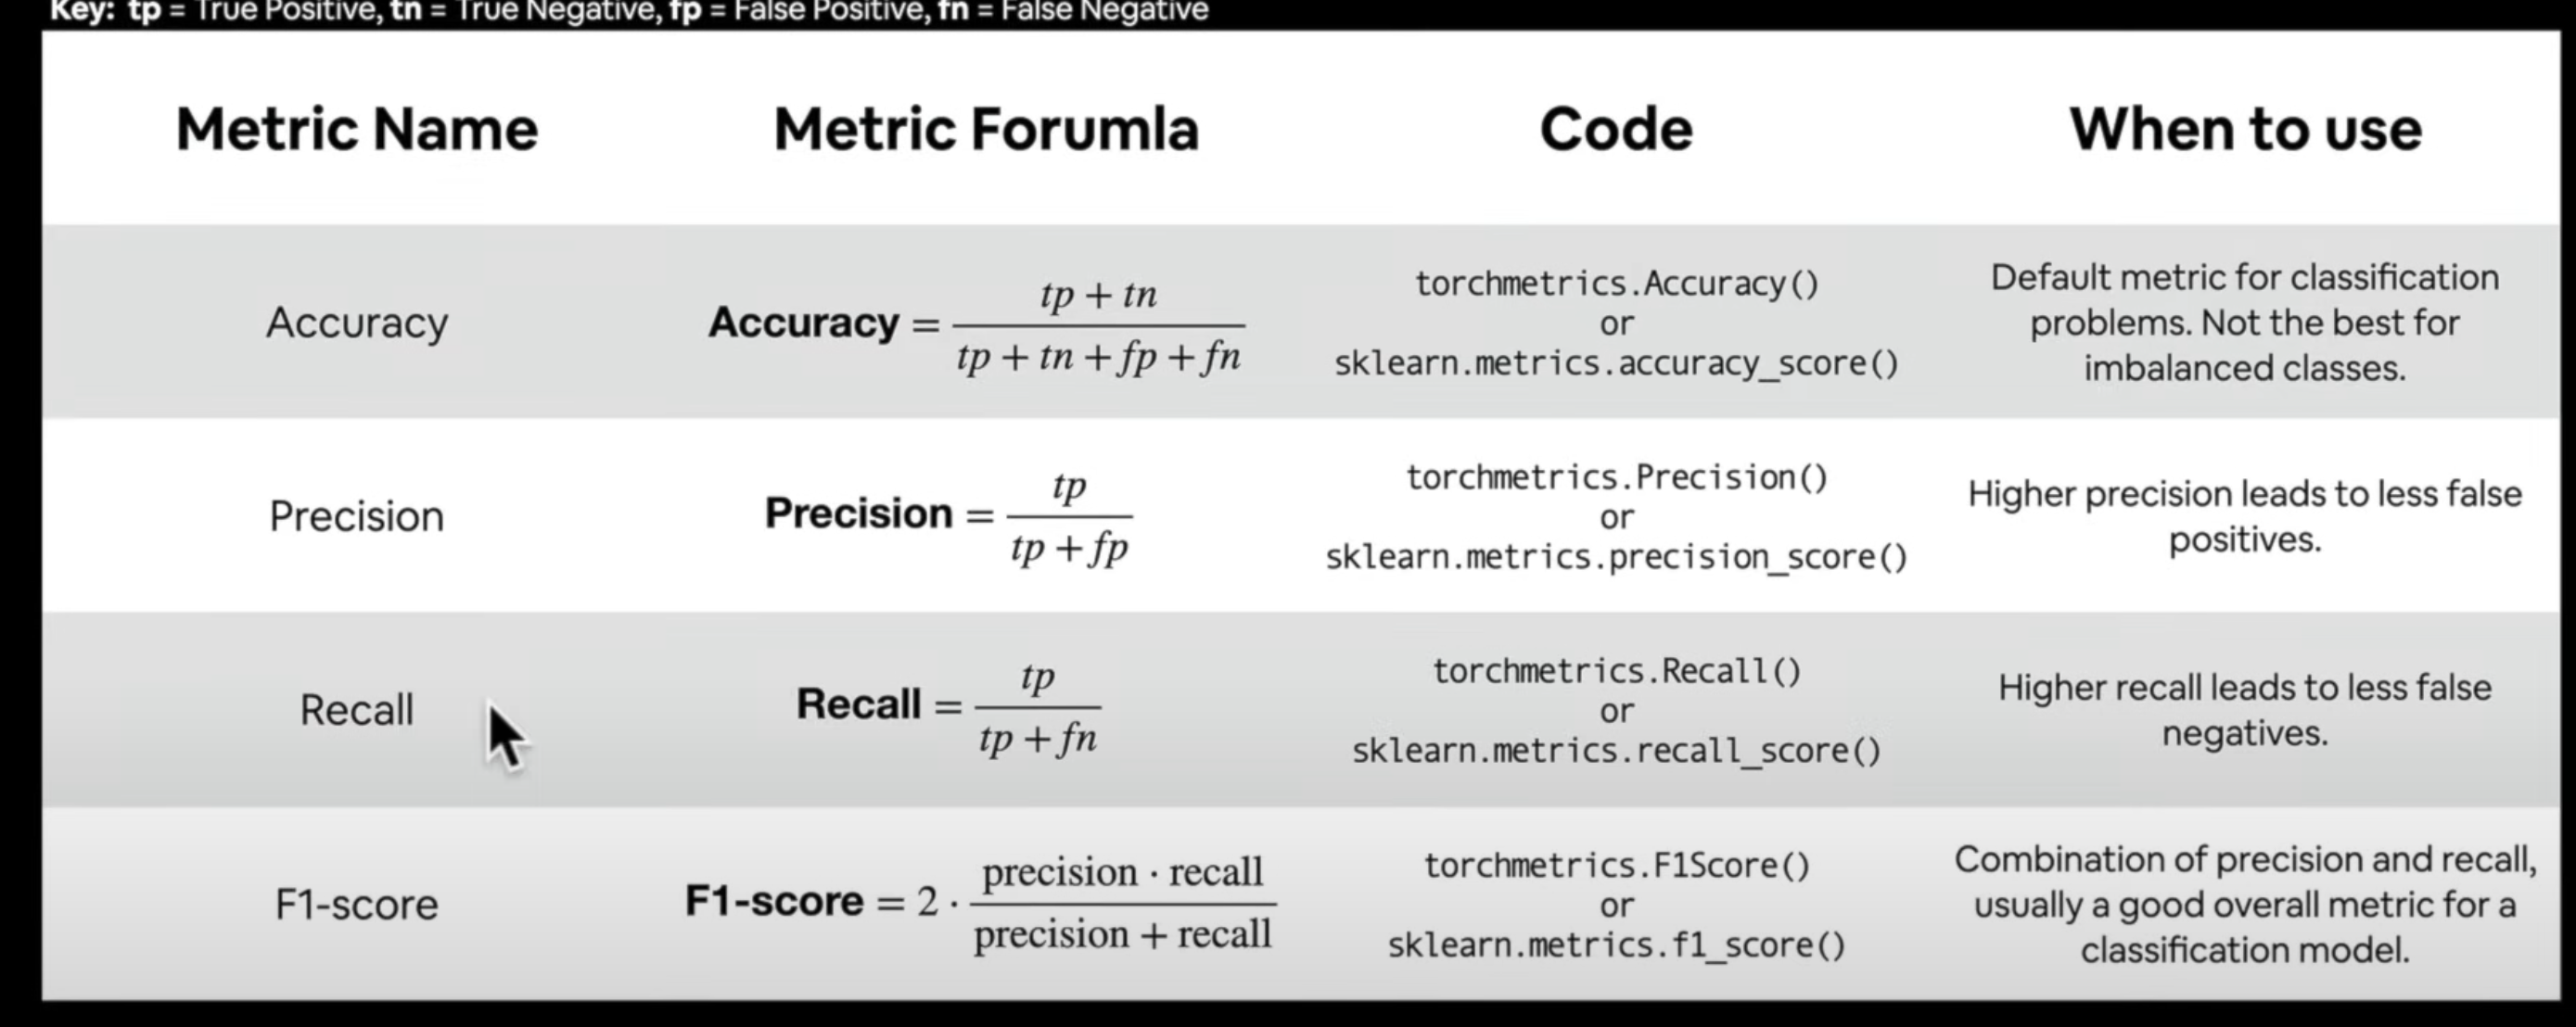


In [38]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 781.7 kB/s eta 0:00:00


In [46]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

torchmetric_accuracy(test_preds , y_blob_test) * 100


tensor(98.8000)

In [51]:
from torchmetrics.classification import Precision, Recall, F1Score

torchmetric_precision = Precision(task="multiclass", num_classes=4, average="macro").to(device)
torchmetric_recall = Recall(task="multiclass", num_classes=4, average="macro").to(device)
torchmetric_f1 = F1Score(task="multiclass", num_classes=4, average="macro").to(device)


precision = torchmetric_precision(test_preds, y_blob_test)
recall = torchmetric_recall(test_preds, y_blob_test)
f1 = torchmetric_f1(test_preds, y_blob_test)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9881
Recall: 0.9878
F1 Score: 0.9879
